# CVR-Net: A deep convolutional neural network for coronavirus recognition from chest radiography images
**Authors:** Md. Kamrul Hasan and Md. Ashraful Alam


Corresponding Author- <br>
**Md. Kamrul Hasan**  <br>
Erasmus Scholar [2017-2019] <br>
M.Sc. in Medical Imaging and Applications (MAIA)(https://maiamaster.udg.edu/ ) <br>
& <br>
Assistant Professor <br>
Department of Electrical and Electronic Engineering (EEE) <br>
Khulna University of Engineering & Technology (KUET) <br>
Khulna-9203, Bangladesh <br>


E-mail: kamruleeekuet@gmail.com or m.k.hasan@eee.kuet.ac.bd<br>
G.Scholar: https://scholar.google.com/citations?user=36WXELIAAAAJ&hl=en


**Md. Ashraful Alam**  <br>
E-mail: ashrafulalam16e@gmail.com  <br>
Github: https://github.com/ashraful16


### Loading of different packagaes and APIs

In [1]:
import os
import glob
import warnings 
import itertools
from itertools import cycle
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import interp
from datetime import datetime
from inspect import signature
import matplotlib.pyplot as plt
from collections import Counter

import keras
from keras import backend as K
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.optimizers import *
from keras.utils import plot_model
from keras.engine.input_layer import Input
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import *
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.densenet import DenseNet121
from keras.engine.input_layer import Input
from keras.utils import plot_model

from sklearn.metrics import *
print(keras.__version__)


Bad key "text.kerning_factor" on line 4 in
C:\Users\ml\Anaconda3\envs\gpu4\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Using TensorFlow backend.


2.3.1


### The Python Library we widely used are :

<ul>
    <li>Numpy</li>
    <li>Keras</li>
    <li>Pandas</li>
    <li>scipy</li>
    <li>Sklearn</li>
</ul>

<b>Numpy : </b>[NumPy](https://numpy.org/) is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python. <br>
<b>Keras : </b>[Keras](https://keras.io/) is an open-source neural network library written in Python.
 It is capable of running on top of TensorFlow, Microsoft Cognitive
 Toolkit, R, Theano, or PlaidML. It is designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.</b> <br>
<b>Pandas : </b>In Python programming language for data manipulation and analysis [Pandas](https://pandas.pydata.org/) is widely Used . In particular, it offers data structures and operations for manipulating numerical tables and time series.<br>
<b>SciPy : </b>[SciPy](https://www.scipy.org/) is a free and open-source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing.

<b> Scikit-learn : </b>[Scikit-learn](https://scikit-learn.org/stable/index.html) is a library in Python that provides many unsupervised and supervised learning algorithms. It’s built upon some of the technology with, like NumPy, pandas, and  Matplotlib! Scikit-learn is largely written in Python and uses NumPy extensively for high-performance linear algebra and array operations. 

</ul>


### Utility Functions

In [2]:

def Performance_helper(true_class,pred,num_classes, target_names):
    #...............................Description of this Helper Function............................................
    
    # This function will take True calss label from the Image Test Generator and Predicted Label from the CNN classifier.
    
    # Objectives of the Function are given below--
    
    # 1. This will plot ROC curve with the AUC values
    # 2. Normalized Confusion Matrix
    # 3. Classification Report for the Classifier 
    # 4. Average Precision Score 
    # 5. Precision VS Recal Curve 
    
    #..............................................................................................................................................................................................
    
    #---------------------------------------ROC and AUC----------------------------------------------
    # Number of Class which is number of output Neuron. In this example it is 3 which are {'bkl': 1, 'mel': 2, 'bcc': 0}.
    true_classes=keras.utils.to_categorical(true_class, num_classes=num_classes)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(true_classes[:, i], pred[:, i]) # Getting TPR and FPR for different threshold using sklearn Function roc_curve. 
        roc_auc[i] = auc(fpr[i], tpr[i])        # Sklean function auc will return Area Under the ROC curve value using previous TPR and FPR.
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(num_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        
    # Finally average it and compute AUC.
    mean_tpr /= num_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Define the figures and plot the ROC curve. To plot the ROC curve matplotlib has been used. 
    plt.figure()
    plt.plot(fpr["macro"], tpr["macro"], label='Macro-avg ROC with AUC = {0:0.3f}'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle='-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier with AUC = 0.5 ',lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid('on')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Macro Average ROC curve')
    plt.legend(loc="lower right")
    plt.show()
    
    #--------------------------------------ConfusionMatrix----------------------------------------
    predicted_classes = np.argmax(pred,axis=1) # Assing the class label either Lesion or Nevus [{'bkl': 1, 'mel': 2, 'bcc': 0}]
    classes=target_names
#     title='Normalized Confusion Matrix'
    cmap=plt.cm.Blues
    cm = confusion_matrix(true_class, predicted_classes)
    
#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalizing the TP, FP, FN and TN in Confusion Matrix
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    
    #--------------------------------------------Precision VS Recal Analysis---------------------------------------------------
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()      
    x = np.float32(true_classes)
    for i in range(num_classes):
        precision[i], recall[i], _ = precision_recall_curve(true_classes[:, i], pred[:, i])
        average_precision[i] = average_precision_score(x[:, i], pred[:, i])

    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(true_classes.ravel(), pred.ravel())
    average_precision["micro"] = average_precision_score(true_classes, pred, average="micro")
#     print('Average precision score (micro-averaged over all classes): {0:0.2f}'.format(average_precision["micro"]))
    ClassificationReport=classification_report(true_class, predicted_classes, target_names=target_names,
                                              digits=3)
    print(ClassificationReport)
    
    plt.figure()
    plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,where='post')
    plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',**step_kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
#     plt.title('Precision VS Recall Curve')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Average precision score, micro-averaged over all classes: AP={0:0.3f}'.format(average_precision["micro"]))
    
    
    
def WrongClassifiedImages(Test_generator, pred, ImageDir):
    #............................................................Description of this Helper Function.................................................................................
    
    # This function will take the Image Test Generator, Predicted Label from the CNN classifier and  test Image Directory.
    
    # Objectives of the Function are given below--
    
    # 1. This will print total number of mis-classified Images 
    # 2. It will show all the the mis-classified Images with confidence label
    
    #..............................................................................................................................................................................................
    
    # Get the filenames from the generator
    fnames = Test_generator.filenames
    
#     print(fnames)

    predicted_classes=np.argmax(pred,axis=1)

    # Get the label to class mapping from the generator
    label2index = Test_generator.class_indices

    # Getting the mapping from class index to class label
    idx2label = dict((v,k) for k,v in label2index.items())

    errors = np.where(predicted_classes != Test_generator.classes)[0]
    print("No of errors = {}/{}".format(len(errors),Test_generator.samples))


    # Show the errors Images. Here, I am showing all ( len(errors)) the Mis-classified Image. If you want some first specific Numbers, Please, change the Numbers.
    NumberImages=len(errors)
    for i in range(len(errors)):
        pred_class = np.argmax(pred[errors[i]])
        # print pred_class.dtype
        pred_label = idx2label[pred_class]
        fileName = fnames[errors[i]]
        title = 'Original label: {}, Prediction: {}, Confidence Prob.: {:.3f}, Image Name: {}'.format(fileName[-30:-24], pred_label, pred[errors[i]][pred_class], fileName[-23:])
        original = image.load_img('{}/{}'.format(ImageDir,fnames[errors[i]]))
        plt.figure(figsize=[3,3])
        plt.axis('off')
        plt.title(title)
        plt.imshow(original)
        plt.show()
# WrongClassifiedImages(test_generator, predict, test_data_dir)




def ROC(n_classes, test_generator, Y_p_class_categorical,Line,color,lw, linestyle,alpha,name):
    
    Y_t_class_categorical = keras.utils.to_categorical(test_generator.classes, num_classes=n_classes, dtype='float32')
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(noClass):
        fpr[i], tpr[i], _ = roc_curve(Y_t_class_categorical[:,i], Y_p_class_categorical[:,i])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"] = all_fpr
    tpr["micro"] = mean_tpr
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    plt.plot(fpr["macro"],
             tpr["macro"],
             color=color,
             label= 'ROC for '+name+' (AUC  = %0.3f)' % (roc_auc["macro"]),
             lw=2,
             linestyle = linestyle,
             alpha=alpha
            )
    
    if Line ==True:  
        TN, FP, FN, TP = confusion_matrix(test_generator.classes, np.argmax(Y_p_class_categorical, axis=1)).ravel()
        sen = (np.sum(TP))/(np.sum(TP)+np.sum(FN))
        spe = (np.sum(TN))/(np.sum(TN)+np.sum(FP))
        plt.scatter((1-spe), sen, s=80, c='r', marker='x',)
        plt.scatter(0, sen, s=80, c='r', marker='x',)
        plt.scatter((1-spe),0, s=80, c='r', marker='x',)
        plt.axhline(y=sen, color='r', linestyle='--')
        plt.axvline(x=(1-spe), color='r', linestyle='--')
        plt.text((1-spe), 0.02, "FPR={:0.3f}".format((1-spe)))
        plt.text(0.009, sen+0.05, "TPR={:0.3f}".format(sen))

    plt.plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.3)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.grid('on')
#     plt.show()




def get_class_weights(y):
    '''
     Input: y = True label data
     
     output: returns a dictonary according to the number of instance in each class'''
    
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: round(float(majority)/float(count), 2) for cls, count in counter.items()}



### Fix Data Directory and parameters of model

In [3]:
#############################   define the data dircetory   #######################################
imagepath = os.getcwd()
training_data_dir = imagepath+'/Train/' 
validation_data_dir = imagepath+'/Val/' 
test_data_dir = imagepath + '/Test/' 

####################################################################################################


#############################   define the parameters of model #####################################

IMAGE_WIDTH, IMAGE_HEIGHT = 224,224                 # image size

epochs = 200                                        #number of epoch
BATCH_SIZE_Train = 8                                #training batch size
BATCH_SIZE_Val = 8                                  #validation batch size
BATCH_SIZE_Test = 1                                 #testing batch size

monitors = 'val_accuracy'                           # model save monitor metrics


# set channel 3 for rgb image and for grayscale image 1
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)        # input image shape 


######################################### select task type ###########################################
''' 
        for multi-class classification options
            1.  noClass = 2, class_list=  ['class: NOR','class: NCP'],
            2.  noClass = 3, class_list=  ['class: NOR','class: CPN','class: NCP'],
            3.  noClass = 4,['class: NOR','class: CPB','class: CPV','class: NCP']

'''

noClass = 2                                         #total number of class
class_list= ['class: NOR','class: NCP']           # class list
             

########################################################################################################

### Read Data and Find the distribution of each class 

In [4]:

##########################  data augmentation with fliping  ############################################
training_data_generator = ImageDataGenerator(horizontal_flip=True,
                                             vertical_flip=True)

# training data generator from a directory
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE_Train,
    class_mode="categorical",
#     color_mode="grayscale",                         # if colour image set rgb 
    shuffle=True)
########################################################################################################



##########################  validation and test data read from directory  ##############################
validation_data_generator = ImageDataGenerator()

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE_Val,
    class_mode="categorical",
#     color_mode="grayscale",                         # if colour image set rgb
    shuffle=True)


test_data_generator = ImageDataGenerator()

test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE_Test,
    class_mode="categorical", 
#     color_mode="grayscale",                         # if colour image set rgb
    shuffle=False)  

#########################################################################################################


############################   print the image distribution read by generator    ########################  
print(training_generator.classes)
print(validation_generator.classes)
print(test_generator.classes)

print(len(training_generator.classes))
print(len(validation_generator.classes))
print(len(test_generator.classes))


##########################################################################################################



###########################  define callbacks for the control of training model ##########################
early_stopping = EarlyStopping(monitor= monitors,
                               patience=13,
                               verbose=1,
                               mode='max')

reduce_lr = ReduceLROnPlateau(monitor= monitors,
                               factor=0.1,
                               patience=4,
                               verbose=1,
                               mode='max',
                               min_lr=0.00000001)

###########################################################################################################



################################## Calculate the weight of each class #####################################

class_weights = get_class_weights(training_generator.classes)
print(class_weights)
print(training_generator.class_indices)
# print(validation_generator.class_indices)
# print(test_generator.class_indices)

###########################################################################################################

Found 5080 images belonging to 2 classes.
Found 1277 images belonging to 2 classes.
Found 1277 images belonging to 2 classes.
[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
5080
1277
1277
{0: 1.0, 1: 11.7}
{'01_NOR': 0, '03_NCP': 1}


In this context, we implemented a CNN-based end-to-end multi-tasking network, where we apply multi-encoder and multi-scale ensembling, From five different convolution layers we extract features and classify them
individually. Finally, we ensemble the output of every convolution layer classification performance. For small datasets, this type of model is beneficial. If one encoder fails to generate responsible features, another encoder can compensate it and vice-versa; if the feature quality is reduced in the
deeper blocks (lower resolution), the prior blocks (higher resolution) can also compensate it and vice-versa. Another positive prospect of this model is, during the training time, it can be anticipated that if the gradient of one or more branches vanishes, then other branches can recover it as the final gradient is the average of all the individual gradient.

### Create Model

In [5]:
## define input tensor shape of image
inputImage = Input(shape=input_shape)

resnet50 = ResNet50(weights='imagenet', include_top=False, input_tensor=inputImage, input_shape=input_shape)


###################################### Rename model layers ###################################################



#rename the layers of model because each model some layers contain same name 

for layer in resnet50.layers:
    layer.name = str("res_")+layer.name
# resnet50.summary()


xce = Xception(weights='imagenet', include_top=False,input_tensor=inputImage, input_shape=input_shape)
for layer in xce.layers:
    layer.name = str("xce_")+layer.name 
# xce.summary()
##############################################################################################################

### Extract features from different Convolutional  Layes and Classify the image based on these different features. Finally, based on this classification results, ensemble the models output.

In [6]:
##################################### create model and visualize ############################################

#----------------------------------       Model-1   ---------------------------------------------------------
X = concatenate(([resnet50.output, xce.output]))
x = GlobalAveragePooling2D()(X)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu',name='MKH_1')(x)
cat_1 = Dense(noClass, activation='softmax')(x)



#--------------------------------------   Model-2    --------------------------------------------------------

X = resnet50.get_layer('res_activation_40').output
x = GlobalAveragePooling2D()(X)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu',name='MKH_2')(x)
resnet_4th = Dense(noClass, activation='softmax')(x)


#--------------------------------------  Model-3 ------------------------------------------------------------

X = resnet50.get_layer('res_activation_22').output
x = GlobalAveragePooling2D()(X)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu',name='MKH_3')(x)
resnet_3th = Dense(noClass, activation='softmax')(x)



#------------------------------------  Model-4   --------------------------------------------------------------

X = xce.get_layer('xce_block4_sepconv2_bn').output
x = GlobalAveragePooling2D()(X)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu',name='MKH_4')(x)
xcept_3rd = Dense(noClass, activation='softmax')(x)


#----------------------------------    Model-5    -------------------------------------------------------------
X = xce.get_layer('xce_block13_sepconv2_bn').output
x = GlobalAveragePooling2D()(X)
x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu',name='MKH_5')(x)
xcept_4th = Dense(noClass, activation='softmax')(x)

averaging = Average()([cat_1,resnet_4th,resnet_3th,xcept_3rd,xcept_4th])

model = Model(inputs=inputImage, outputs=averaging)
model.summary()

#############################################################################################################

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xce_res_input_1 (InputLayer)    (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
res_conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)  0           xce_res_input_1[0][0]            
__________________________________________________________________________________________________
res_conv1 (Conv2D)              (None, 112, 112, 64) 9472        res_conv1_pad[0][0]              
__________________________________________________________________________________________________
res_bn_conv1 (BatchNormalizatio (None, 112, 112, 64) 256         res_conv1[0][0]                  
____________________________________________________________________________________________

#### Define model optimizer, loss function and monitoring metrics & train and save model

In [7]:


###################################### Define optimizers and compile model #################################
opt=Adamax(lr=0.0001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

#############################################################################################################


##################################### Define model saving function  #########################################
filepath="Model_task_1_Fold_2.hdf5"


# Uncomeent this lines if you have alrady weight
print ('Weights are Loading............................')
model.load_weights(filepath)
print ('Weights loading Done!!!!!......................')


modelSave = ModelCheckpoint(filepath,
                        monitor= monitors,
                        verbose=1,
                        save_best_only=True,
                        save_weights_only=True,
                        mode='max')

#############################################################################################################




##################################### Training our data  ####################################################
# model.fit_generator(training_generator,
# steps_per_epoch=len(training_generator.classes)//training_generator.batch_size,
# epochs=epochs,
# verbose=1,
# validation_data=validation_generator,
# validation_steps=len(validation_generator.classes)//validation_generator.batch_size,
# class_weight = class_weights,
# callbacks= [early_stopping,reduce_lr,modelSave])

#############################################################################################################



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xce_res_input_1 (InputLayer)    (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
res_conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)  0           xce_res_input_1[0][0]            
__________________________________________________________________________________________________
res_conv1 (Conv2D)              (None, 112, 112, 64) 9472        res_conv1_pad[0][0]              
__________________________________________________________________________________________________
res_bn_conv1 (BatchNormalizatio (None, 112, 112, 64) 256         res_conv1[0][0]                  
____________________________________________________________________________________________

Weights loading Done!!!!!......................


### Evaluate the prefomance of created model

Weights are Loading............................
Weights loading Done!!!!!......................
1277/1277 [==============================] - 51s 40ms/step


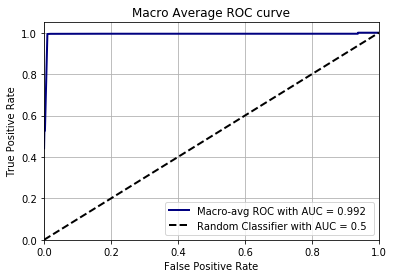

              precision    recall  f1-score   support

  class: NOR      0.998     0.999     0.999      1176
  class: NCP      0.990     0.980     0.985       101

    accuracy                          0.998      1277
   macro avg      0.994     0.990     0.992      1277
weighted avg      0.998     0.998     0.998      1277



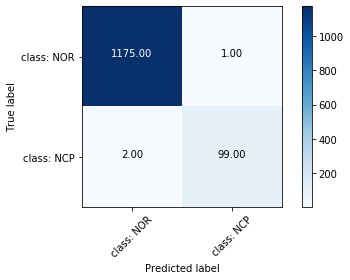

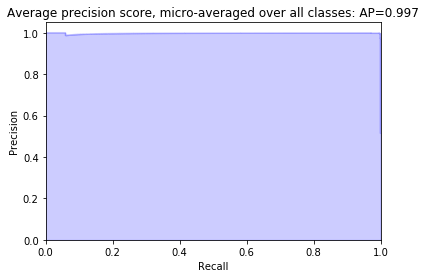

In [8]:

##################################### Evaluate model perfomance on test data  ##############################
print ('Weights are Loading............................')
model.load_weights(filepath)
print ('Weights loading Done!!!!!......................')

predict_Array = []
predict = model.predict_generator(test_generator,
                           steps = len(test_generator.classes)//test_generator.batch_size,
                           verbose=1)
predict_Array.append(predict)

#############################################################################################################




################################# Call helper function to visualize the evaluation metrics  #################
Performance_helper(test_generator.classes,
                   predict,
                   noClass,
                   target_names=class_list)  
##############################################################################################################